### Projeto com Feedback 4

#### Prevendo Customer Churn em Operadoras de Telecom

Identificar Rotatividade dos clientes (customer churn) de operadora de TELECOM. Prever se os clientes abandonarão o relacionamento comercial.
Análise é um trabalho de classificação (sim/não)

In [1]:
#imports
import pandas as pd
import missingno as msn
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [2]:
# importando dados para análise, usando pandas
telecon_df = pd.read_csv('projeto4_telecom_treino.csv')
telecon_df_test = pd.read_csv('projeto4_telecom_teste.csv')

In [3]:
# visualizando primeiros registros
telecon_df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### Verificando variáveis categóricas para converter em numéricas

In [4]:
telecon_df['international_plan'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
telecon_df['international_plan'] = telecon_df['international_plan'].replace(['yes','no'],[0,1])
telecon_df_test['international_plan'] = telecon_df_test['international_plan'].replace(['yes','no'],[0,1])

In [6]:
telecon_df['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
telecon_df['voice_mail_plan'] = telecon_df['voice_mail_plan'].replace(['yes','no'],[0,1])
telecon_df_test['voice_mail_plan'] = telecon_df_test['voice_mail_plan'].replace(['yes','no'],[0,1])

### convertendo variavel target que está categórica par numérica

In [8]:
telecon_df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
telecon_df['churn'] = telecon_df['churn'].replace(['yes','no'],[0,1])
telecon_df_test['churn'] = telecon_df_test['churn'].replace(['yes','no'],[0,1])

### Removendo variáveis que não seráo utilizadas na análise

In [10]:
telecon_df.drop(['Unnamed: 0'], axis=1, inplace=True)
telecon_df.drop(['state'], axis=1, inplace=True)
telecon_df.drop(['area_code'], axis=1, inplace=True)

telecon_df_test.drop(['Unnamed: 0'], axis=1, inplace=True)
telecon_df_test.drop(['state'], axis=1, inplace=True)
telecon_df_test.drop(['area_code'], axis=1, inplace=True)

<AxesSubplot:>

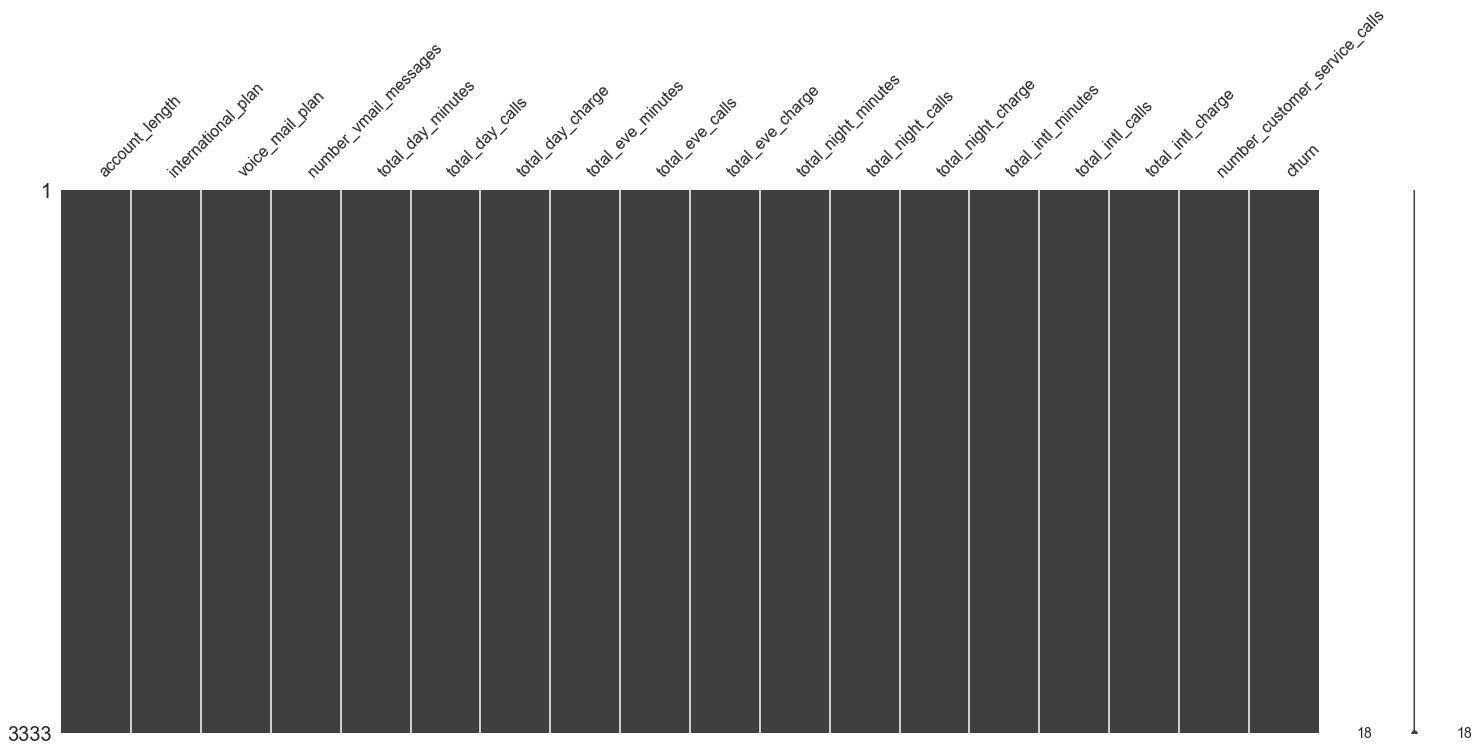

In [11]:
# verificando se possue dados missing
msn.matrix(telecon_df)

In [12]:
# verificando se o dataset possui dados missing
telecon_df.isna().values.any()

False

In [13]:
# verificando estatistica descritiva das colunas
telecon_df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.723372,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.855086
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,1.000000
50%,101.000000,1.000000,1.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.000000
75%,127.000000,1.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,1.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


### Verificando graficamente com boxplot a distribuição dos dados, para verificar outliers

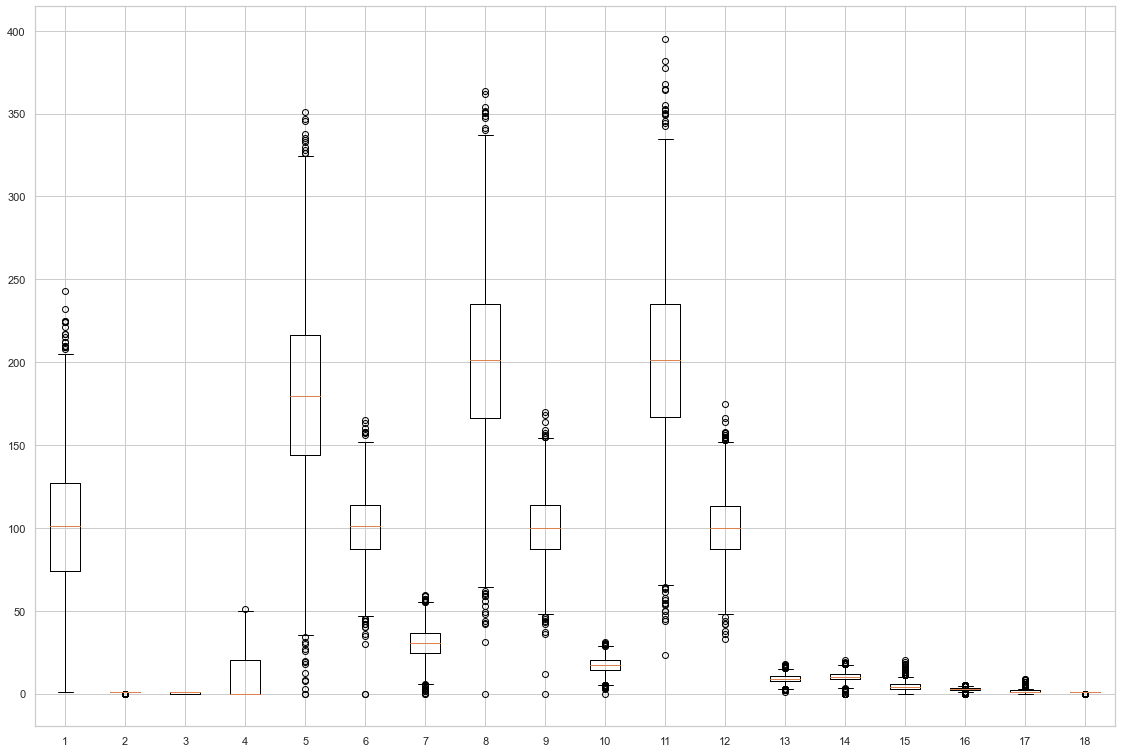

In [14]:

fig = plt.figure(figsize =(15, 10))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(telecon_df)
 
# show plot
plt.show()

<AxesSubplot:xlabel='total_day_charge'>

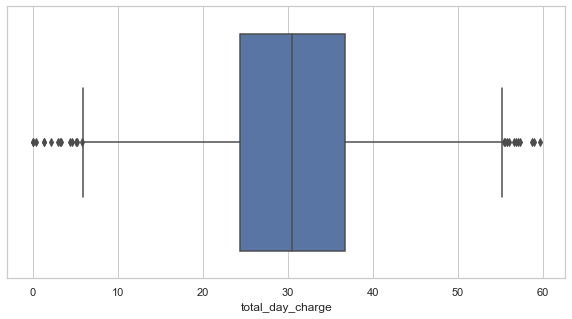

In [15]:
fig = plt.figure(figsize =(10, 5))
sns.boxplot(telecon_df['total_day_charge'])

<AxesSubplot:xlabel='number_customer_service_calls'>

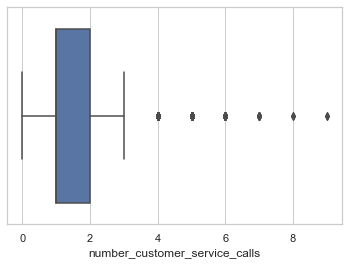

In [16]:
sns.boxplot(telecon_df['number_customer_service_calls'], orient="h")

<AxesSubplot:xlabel='total_intl_charge'>

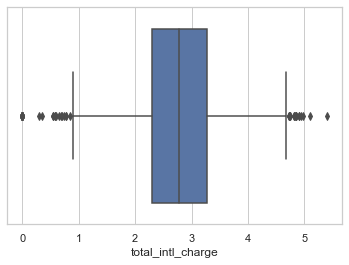

In [17]:
sns.boxplot(telecon_df['total_intl_charge'], orient="h")

In [18]:
# verificando tipo das colunas
telecon_df.dtypes

account_length                     int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [19]:
# verificando a correlação entre as variáveis
telecon_df.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.024735,-0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,-0.016541
international_plan,-0.024735,1.000000,0.006006,-0.008745,-0.049396,-0.003755,-0.049398,-0.019100,-0.006114,-0.019106,0.028905,-0.012451,0.028913,-0.045871,-0.017366,-0.045780,0.024522,0.259852
voice_mail_plan,-0.002918,0.006006,1.000000,-0.956927,0.001684,0.011086,0.001686,-0.021545,0.006444,-0.021559,-0.006079,-0.015553,-0.006064,0.001318,-0.007618,0.001276,0.017824,-0.102148
number_vmail_messages,-0.004628,-0.008745,-0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,0.089728
total_day_minutes,0.006216,-0.049396,0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,-0.205151
total_day_calls,0.038470,-0.003755,0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,-0.018459
total_day_charge,0.006214,-0.049398,0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,-0.205151
total_eve_minutes,-0.006757,-0.019100,-0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,-0.092796
total_eve_calls,0.019260,-0.006114,0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,-0.009233
total_eve_charge,-0.006745,-0.019106,-0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,-0.092786


### Plotando um scaterplot (gráfico de dispersão) entre algumas variáveis preditoras

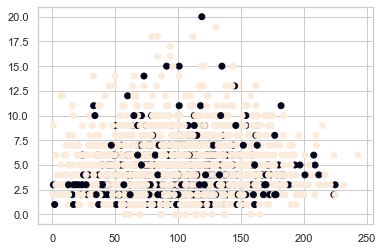

In [20]:
plt.scatter(telecon_df['account_length'],telecon_df['total_intl_calls'], c=telecon_df['churn'])

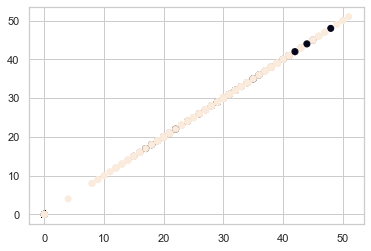

In [21]:
plt.scatter(telecon_df['number_vmail_messages'],telecon_df['number_vmail_messages'], c=telecon_df['churn'])

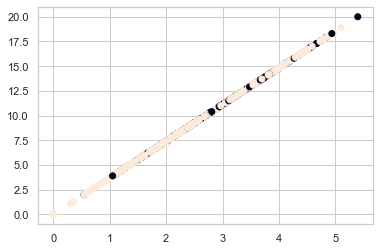

In [22]:
plt.scatter(telecon_df['total_intl_charge'],telecon_df['total_intl_minutes'], c=telecon_df['churn'])

In [23]:
# separando em dados de treino e teste
X_train = telecon_df.drop('churn', axis=1)
Y_train = telecon_df['churn']

X_test = telecon_df_test.drop('churn', axis=1)
Y_test = telecon_df_test['churn']


In [24]:
# utilizando SVM com configuração padrão
from sklearn import svm

In [25]:
modelo = svm.SVC()

In [26]:
modelo.fit(X_train, Y_train)

SVC()

In [27]:
# fazendo validação cruzada par avaliar o modelo
resultado = cross_val_score(modelo, X_test, Y_test, cv=5, scoring='roc_auc')

print("Acurácia Final %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final 74.808%


In [28]:
valores_previstos = modelo.predict(X_test)

#### verificando porcentagem de acertos e erros (verdadeiro positivo, falso positivo, verdadeiro negativo, falso negativo)

<AxesSubplot:>

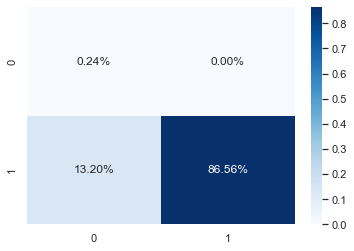

In [29]:
cm = confusion_matrix(valores_previstos, Y_test)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [30]:
# relatório de classificação
print(classification_report(Y_test, valores_previstos))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       224
           1       0.87      1.00      0.93      1443

    accuracy                           0.87      1667
   macro avg       0.93      0.51      0.48      1667
weighted avg       0.89      0.87      0.81      1667



In [31]:
telecon_df2 = telecon_df.drop('churn', axis=1)

In [32]:
# normalizando os dados para ficar na mesma escala, com comprimento igual a 1
# aplicando Normalizer
from sklearn.preprocessing import MinMaxScaler

In [33]:
# instanciando modelo de normalizer
scaler = MinMaxScaler().fit(telecon_df2)

In [34]:
# carregando modelo (treinando), removendo a coluna target
normalizedX = scaler.transform(telecon_df2)

In [35]:
norm_telecon_df2 = pd.DataFrame(normalizedX, columns=telecon_df2.columns)

In [36]:
norm_telecon_df2.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,1.0,0.0,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111
1,0.438017,1.0,0.0,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111
2,0.561983,1.0,1.0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000
3,0.342975,0.0,1.0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222
4,0.305785,0.0,1.0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333


In [37]:
norm_telecon_df2['churn'] = telecon_df['churn']

In [38]:
from sklearn.decomposition import PCA

In [39]:
# aplicando algoritmo de PCA para diminuir a quantidade de features
pca_fitted = PCA(n_components=8, random_state=42)
new_dataset = pd.DataFrame(pca_fitted.fit_transform(norm_telecon_df2))

In [40]:
new_dataset['churn'] = telecon_df['churn']

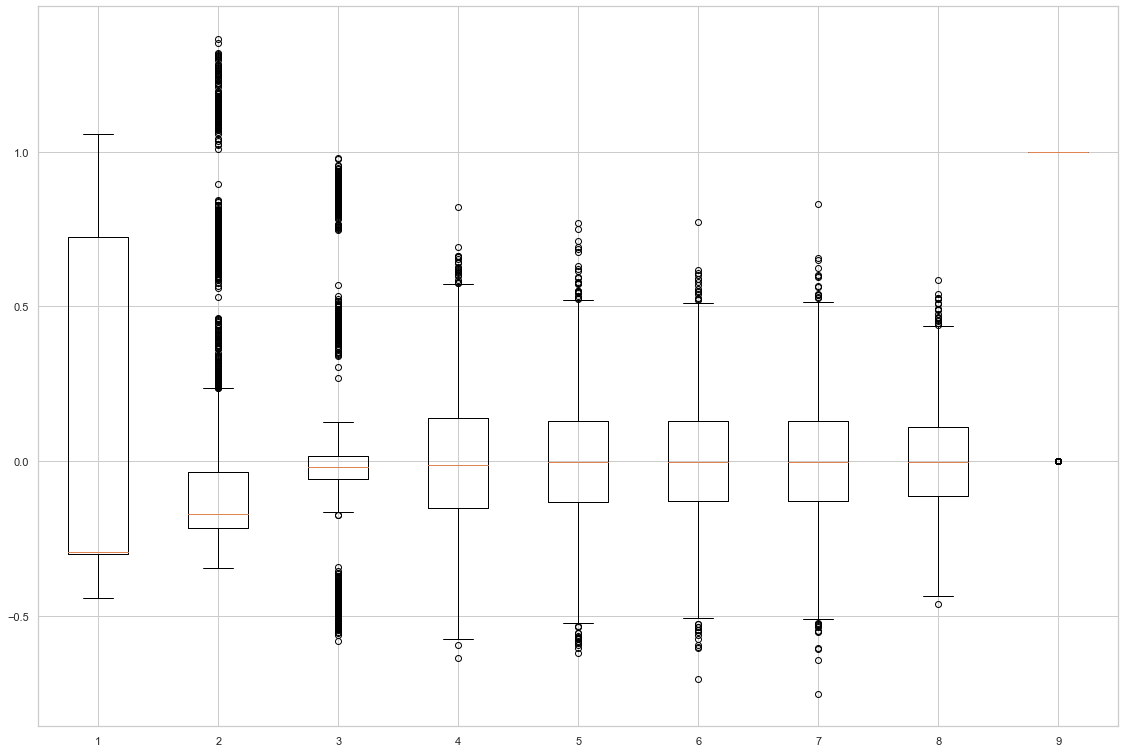

In [41]:
fig = plt.figure(figsize =(15, 10))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(new_dataset)
 
# show plot
plt.show()

# preparando as variáveis de teste

aplicando preprocessamento com minmaxscaller

diminuindo dimencionalidade com o PCA

In [42]:

telecon_df2_test = telecon_df_test.drop('churn', axis=1)

scalerTest = MinMaxScaler().fit(telecon_df2_test)
normalizedXTest = scalerTest.transform(telecon_df2_test)
norm_telecon_df2Test = pd.DataFrame(normalizedXTest, columns=telecon_df2_test.columns)
norm_telecon_df2Test['churn'] = telecon_df_test['churn']

pca_fitted_test = PCA(n_components=8, random_state=42)
new_datasetTest = pd.DataFrame(pca_fitted_test.fit_transform(norm_telecon_df2Test))

new_datasetTest['churn'] = telecon_df_test['churn']

In [43]:
# carregando variaveis de treino e teste
X_train = new_dataset.drop('churn', axis=1)
Y_train = new_dataset['churn']

X_test = new_datasetTest.drop('churn', axis=1)
Y_test = new_datasetTest['churn']


In [44]:
# carregando algoritmo de classificação SVM
modelo = svm.SVC()

In [45]:
# treinando modelo (carregando algoritmo de classificação de acordo cos os dados de treino)
modelo.fit(X_train, Y_train)

SVC()

In [46]:
# verificando acurácia do modelo
resultado = cross_val_score(modelo, X_test, Y_test, cv=5, scoring='roc_auc')

print("Acurácia Final %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final 100.000%


In [47]:
valores_previstos = modelo.predict(X_test)

# relatório de classificação
print(classification_report(Y_test, valores_previstos))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00      1443

    accuracy                           1.00      1667
   macro avg       1.00      1.00      1.00      1667
weighted avg       1.00      1.00      1.00      1667



In [48]:
# criando a matrix de confusão para vericar acertos e erros do modelo
cm = confusion_matrix(valores_previstos, Y_test)

#### verificando porcentagem de acertos e erros (verdadeiro positivo, falso positivo, verdadeiro negativo, falso negativo)

<AxesSubplot:>

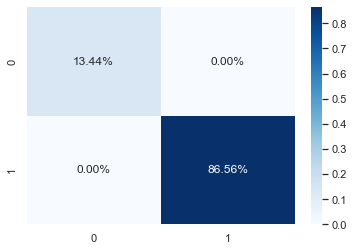

In [49]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')